In [1]:
# We want to parse the ftp pages of UniRef to understand the number of sequences 
# they've released each year

# https://ftp.uniprot.org/pub/databases/uniprot/previous_releases/release-2015_01/relnotes.txt

In [1]:
import requests
import re
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
years = list(range(2011, 2026))
months = ['01']  # Only the January releases since that is saved for all years

base_url = "https://ftp.uniprot.org/pub/databases/uniprot/previous_releases/release-{year}_{month}/relnotes.txt"

data = []

# Patterns to match and extract
patterns = {
    'uniprot': re.compile(r'UniProtKB Release.*?consists of ([\d,]+) entries', re.IGNORECASE),
    'uniref100': re.compile(r'UniRef100 Release.*?consists of ([\d,]+) entries', re.IGNORECASE),
    'uniref90': re.compile(r'UniRef90 Release.*?consists of ([\d,]+) entries', re.IGNORECASE),
    'uniref50': re.compile(r'UniRef50 Release.*?consists of ([\d,]+) entries', re.IGNORECASE)
}

for year in tqdm(years):
    for month in months:
        url = base_url.format(year=year, month=month)
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            text = response.text

            # Extract stats 
            row = {'year': year}
            for key, pattern in patterns.items():
                match = pattern.search(text)
                row[key] = int(match.group(1).replace(',', '')) if match else None

            data.append(row)
        except Exception as e:
            print(f"Failed to retrieve or parse {year}_{month}: {e}")
            

100%|██████████| 15/15 [00:00<00:00, 18.85it/s]


In [4]:
# Convert to DataFrame
df = pd.DataFrame(data)
df = df.sort_values("year")
df.to_csv("data/uniref_years.csv")
df

,year,uniprot,uniref100,uniref90,uniref50
0,2011,13069501,11659891,7623063,3653743
1,2012,19968488,15688962,9843844,4606913
2,2013,29805788,20491136,12880369,6412887
3,2014,52159208,33613081,20200107,9370012
4,2015,89998523,50371270,28628106,11992242
5,2016,60268458,72946704,39362473,16038089
6,2017,74265355,94756963,49122202,20083468
7,2018,108184003,133853533,69029793,30071646
8,2019,140253338,172327164,87296736,32474829
9,2020,178316438,216491817,107153647,39232797


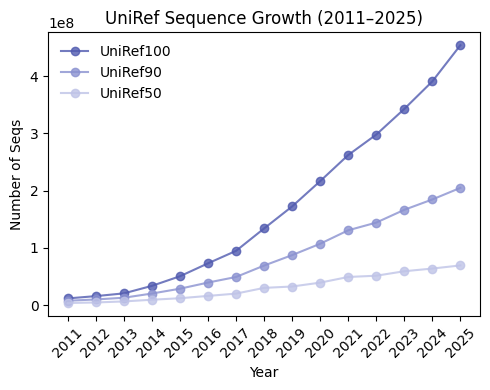

In [5]:
plt.figure(figsize=(5, 4))
plt.plot(df['year'], df['uniref100'], label='UniRef100', marker='o', color="#505AAF", alpha=0.8)
plt.plot(df['year'], df['uniref90'], label='UniRef90', marker='o', color="#8A91D0", alpha=0.8)
plt.plot(df['year'], df['uniref50'], label='UniRef50', marker='o', color="#BFC3E7", alpha=0.8)


plt.title('UniRef Sequence Growth (2011–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Seqs')

plt.legend(frameon=False)
plt.xticks(df['year'], rotation=45)
plt.tight_layout()


plt.savefig("figs/uniref_growth.png", dpi=300, bbox_inches='tight')
plt.show()

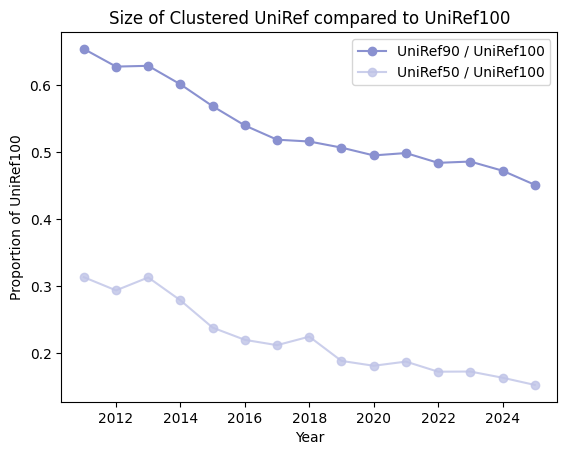

In [6]:
df['prop_90'] = df['uniref90'] / df['uniref100']
df['prop_50'] = df['uniref50'] / df['uniref100']

plt.plot(df['year'], df['prop_90'], label='UniRef90 / UniRef100', marker='o', color="#8A91D0")
plt.plot(df['year'], df['prop_50'], label='UniRef50 / UniRef100', marker='o', color="#BFC3E7", alpha=0.8)

plt.ylabel("Proportion of UniRef100")
plt.xlabel("Year")
plt.title("Size of Clustered UniRef compared to UniRef100")
plt.legend()
plt.grid(False)
plt.savefig("figs/uniref_clustering.png", dpi=300, bbox_inches='tight')

plt.show()